In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

/tmp/ipykernel_10035/2500277595.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
Keywords = [
    'teamId',
    'summonerName',
    'individualPosition',
    'lane',
    'championId',
    'championName',
    'champLevel',
    
    ###### KDA
    'kills',
    'deaths',
    'assists',

    ###### Pings
    'commandPings',
    'assistMePings',
    'enemyMissingPings',
    'getBackPings',
    'dangerPings',
    'onMyWayPings',

    ####### vision
    'visionScore',

    #gamedata
    'win'
]

challenge_Keywords = [
    'stealthWardsPlaced',
    'controlWardsPlaced',
]

team_keywords = [
    'baron',
    'dragon',
    'horde',
    'riftHerald',
    'tower'
]

In [3]:
import mysql.connector
import pandas as pd
eda = mysql.connector.Connect(
    host = "database-1.c96mmei8egml.ap-northeast-2.rds.amazonaws.com",
    port = "3306",
    user = "eda_yc",
    password = "yc",
    database = "eda_project"
)
cursor = eda.cursor()

In [4]:
cursor.execute("SELECT matchId, teamId, SUM(commandPings), SUM(assistMePings), SUM(enemyMissingPings), SUM(getBackPings), SUM(onMyWayPings), SUM(commandPings)+ SUM(assistMePings)+ SUM(enemyMissingPings)+ SUM(getBackPings)+ SUM(onMyWayPings),win FROM match_data Group By matchId, teamId" )
result = cursor.fetchall()
for result_iterator in result:
    print(result_iterator)

('KR_6405857393', 100, Decimal('8'), Decimal('4'), Decimal('22'), Decimal('7'), Decimal('9'), Decimal('50'), 0)
('KR_6405857393', 200, Decimal('6'), Decimal('9'), Decimal('17'), Decimal('1'), Decimal('38'), Decimal('71'), 1)
('KR_6405872127', 100, Decimal('47'), Decimal('4'), Decimal('23'), Decimal('16'), Decimal('23'), Decimal('113'), 1)
('KR_6405872127', 200, Decimal('13'), Decimal('8'), Decimal('46'), Decimal('13'), Decimal('35'), Decimal('115'), 0)
('KR_6405883466', 100, Decimal('24'), Decimal('19'), Decimal('21'), Decimal('7'), Decimal('35'), Decimal('106'), 0)
('KR_6405883466', 200, Decimal('13'), Decimal('8'), Decimal('45'), Decimal('9'), Decimal('16'), Decimal('91'), 1)
('KR_6405890576', 100, Decimal('26'), Decimal('16'), Decimal('28'), Decimal('11'), Decimal('13'), Decimal('94'), 0)
('KR_6405890576', 200, Decimal('13'), Decimal('1'), Decimal('21'), Decimal('1'), Decimal('9'), Decimal('45'), 1)
('KR_6408685527', 100, Decimal('38'), Decimal('18'), Decimal('49'), Decimal('11'), D

In [5]:
df = pd.DataFrame(result)
df.columns = ['matchId', 'teamId', 'Ping', 'help', 'mia', 'back', 'going', 'sum', 'win']
df.dropna(axis=0)
df.sort_values('sum', ascending=False)

matchId  teamId  Ping  help   mia  back going   sum  win
12714  KR_6739977062   100.0   174   204   182   260   590  1410  1.0
52652  KR_6862533340   100.0   345   111   186   120   591  1353  1.0
8617   KR_6689289542   200.0   260   128   174   178   584  1324  1.0
22593  KR_6801668695   200.0   234   118   104   218   440  1114  1.0
7732   KR_6671059865   200.0   222   118   168   112   480  1100  1.0
...              ...     ...   ...   ...   ...   ...   ...   ...  ...
69072  KR_6879413491     NaN  None  None  None  None  None  None  NaN
69075  KR_6879418652     NaN  None  None  None  None  None  None  NaN
69098  KR_6879445122     NaN  None  None  None  None  None  None  NaN
69107  KR_6879457758     NaN  None  None  None  None  None  None  NaN
69110  KR_6879470477     NaN  None  None  None  None  None  None  NaN

[69127 rows x 9 columns]

In [11]:
df['root'] = df['sum'].astype(float) ** 0.5
df['ping_range'] = df['root'] // 2 * 2
df['ping_range'] = df['ping_range']
graph = df.groupby(['ping_range']).apply(lambda x: x['win'].mean()).reset_index(name='win_rate')

/tmp/ipykernel_10035/765240243.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  graph = df.groupby(['ping_range']).apply(lambda x: x['win'].mean()).reset_index(name='win_rate')


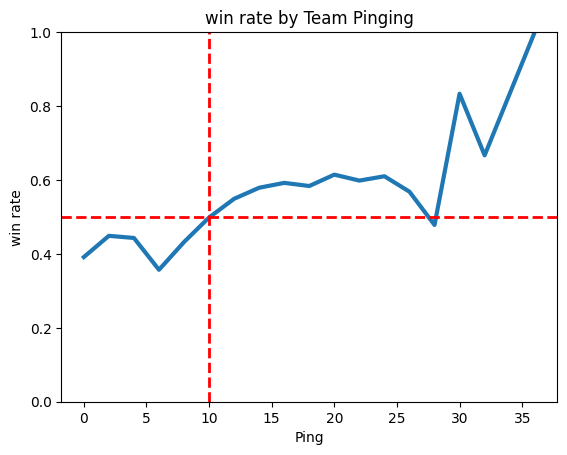

In [14]:
plt.plot(graph['ping_range'], graph['win_rate'], linewidth=3)
plt.title("win rate by Team Pinging")
plt.xlabel("Ping")
plt.ylim(0, 1)
plt.ylabel("win rate")
plt.axhline(y=0.5, color='r', linestyle='--', linewidth=2)
plt.axvline(x=10, color='r', linestyle='--',  linewidth=2)
plt.show()